１章    
学習の種類：教師なし学習、教師あり学習    
モデルの種類：線形回帰、ニューラルネットワーク、SVM、決定木、ランダムフォレスト    
教師あり学習の使用：学習と推定    
ニューラルネットの推定：xw+b=h  →  func(h)     
学習時にやること：良いW（重み）と良いb（バイアス）を求める。    
ニューラルネットの学習時のアルゴリズム：誤差関数の値が小さくなる方向にW（重み）を更新するを繰り返す    

# 2.1 Tensorflowとは

本より    
データの流れをエッジで表した計算グラフによる"DefineandRun"    
CPUやGPUといったデバイス単位だけではなく、ネットワーク上の他のマシンでも実行可能    
PythonやC++のAPIの他にもJava、Go言語も使用可能（2018年1月現在）    
深層学習以外の用途でも使われるように設計されている    



### 環境について

2018年1月現在の最新バージョンは1.4.1です*1。本書でも1.4.1を用いてプログラムを記述していきます。    
→v1.8.0まで出てる。    

ubuntuやmacで使うことを想定しているがwinでも使える。winならではのハマりポイントも多い。python自体がwinの対応に弱いし、c++周りもハマりポイントも多くオススメはしない。    
anacondaでpython2系とpython3系を切り替えるのは非常に便利。pip install tensorflow or pip install tensorflow-gpuを使用。最近kerasが統合された。    
サーバーで使うときはdockerを使うと便利。nvidia-dockerあるいは色んな人が公開してくれてる。    
nvidia-dockerはnvidia-docker2になってるので古い記事はみないほうがいい場合もある。よくあることだけど検索時に１年以内に絞って検索するなど。

- Python    
公式    
https://docs.python.jp/3/index.html    
- GCP    
プログラマのためのGoogle Cloud Platform入門 サービスの全体像からクラウドネイティブアプリケーション構築まで    
- Docker    
プログラマのためのDocker教科書 第2版 インフラの基礎知識&コードによる環境構築の自動化    

 テンソルとは簡単にいう と多次元配列のこと。    
0階テンソルはスカラー 1,2,3,4    
1階テンソルは配列。[1,2]    
2階テンソルは２次元配列。[[1,2],[3,4]]    
3階テンソルは３次元配列。[[[1,2],[3,4]], [[1,2],[3,4]]]    

# 2.2 計算グラフとDefine and Run


計算グラフとはデータの演算処理をノードとエッジを用いて表したグラフ。


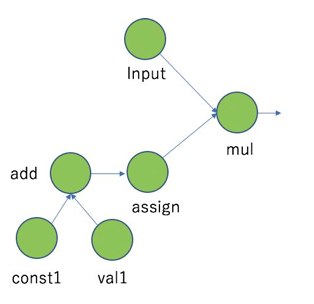

上のグラフをtfで書くと下記のようになる。

In [2]:
import tensorflow as tf

In [22]:
a = tf.constant(3, name='const1') #定数

In [23]:
b = tf.Variable(1, name='val1') #変数

In [24]:
add = tf.add(a, b) #足し算

In [25]:
assign = tf.assign(b, add) #変数bに代入

In [26]:
c = tf.placeholder(tf.int32, name='input') #入力cの場所取り

In [27]:
mul = tf.multiply(assign, c) #掛け算

In [28]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(mul, feed_dict={a:1,c:2})) #計算グラフmulをsessionに渡す。feed_dictに入力値を渡す。

4


## tf.assign

代入

In [40]:
import tensorflow as tf
x = tf.Variable(0)
y = tf.assign(x, 1) #ここの計算と通すとxに代入される
y2 = tf.assign(x, 3) #上に同じ
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(x))
    print(sess.run(y))
    print(sess.run(x))
    print(sess.run(y2))
    print(sess.run(x))

0
1
1
3
3


## Define and RunとDefine by Run

Define and Runの例：Tensorflow、Theano    

Define By Runの例：Pythonは (宣言型プログラミング)、Chainer、Torch、Tensorflow Eager    

一気通貫で書かれた処理を計算するほうが効率が良さそうに見えるが、１つ１つの計算の詳細情報を保持することで局所的な計算ができたり、入出力に対して微分が効率的にできたりする。    
 

大きなモデルを訓練、評価、推論するのに全部計算するのではなく、必要な部分のみ計算できたりする。    
またDefine By Runの方がメモリ使用を最小化できたり計算の実行計画をライブラリ側で最適化しやすい。

→具体的にtensorflowは　gitのどの部分で効率化を行ってるのかをコードを読んだがわからなかった。c++などスキル不足。ちょっとずつ紐解いて行きたい。gitのコミットログの一番初めから読んでいくなど。   


In [88]:
#Define by Runの例
x = 1
y = 2
z = x * y
print(z) #掛け算した結果がzに格納される

2


In [89]:
#Define and Runの例
a = 1
b = 2
c = tf.multiply(a,b)
print(c) #掛け算した結果の数値がcに格納されるわけではない。
#Tensor型が返ってきている

Tensor("Mul_1:0", shape=(), dtype=int32)


In [ ]:
#deeplearning4j
#メソッドチェインで繋いでいく感じに見える

# MultiLayerConfiguration conf = new NeuralNetConfiguration.Builder()
#         .iterations(1)
#         .weightInit(WeightInit.XAVIER)
#         .activation("relu")
#         .optimizationAlgo(OptimizationAlgorithm.STOCHASTIC_GRADIENT_DESCENT)
#         .learningRate(0.05)
#         // ... その他のハイパーパラメータ
#         .backprop(true)
#         .build();

計算を実行するにはセッションでrunする

In [41]:
#Define and Run
a = tf.Variable(0, name='val1')
b = tf.Variable(0, name='val2')
c = tf.multiply(a,b)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(c, feed_dict={a:1,b:2}))

2


## TensorFlow Eager

EagerはDefine by Runに対応中

下記のコードをEagerで書くと簡潔にかける

In [42]:
x = tf.placeholder(tf.float32, shape=[1, 1])
m = tf.matmul(x, x)

with tf.Session() as sess:
    print(sess.run(m, feed_dict={x: [[2.]]}))

[[4.]]


In [46]:
#Eager execution
x = [[2.]]
m = tf.matmul(x, x)

# print(m)  #=>[[4.]] 多分
#Eagerを使えば　こんな感じでかける
#https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/eager

## tf.Variableとtf.constant

変数と定数

今回は０階テンソル（スカラー）の演算を行う。計算グラフの各ノードはオペレーション（何かしらの計算処理）の意味。オペレーションは何かしらのTensorを返す。

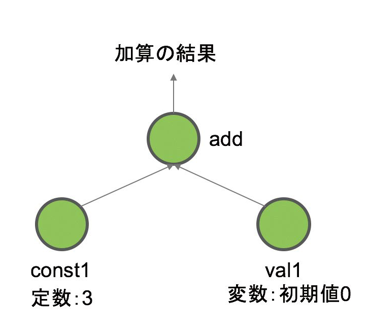

In [116]:
a = tf.constant(3, name='const1')
b = tf.Variable(0, name='val1')
c = tf.add(a,b)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(c, feed_dict={a:1,b:2}))
    print(sess.run(c, feed_dict={a:2,b:3}))

3
5


## tf.placeholder

t.constantやtf.Vasiableは宣言時に初期値を指定する。placeholderは実行する直前まで値がわからないもの。

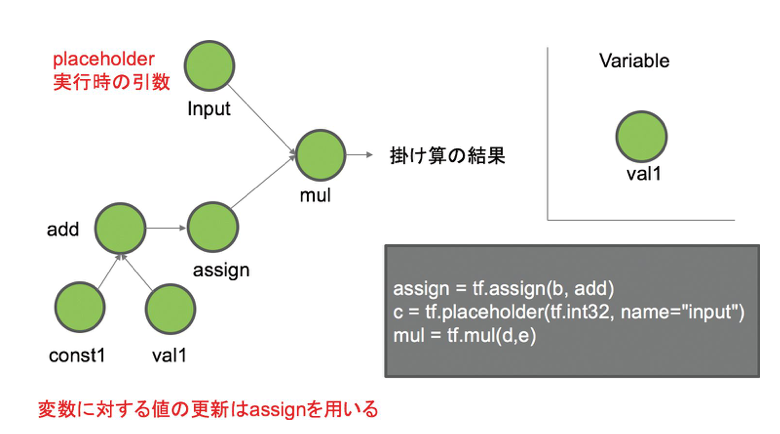

In [31]:
a = tf.constant(3, name='const1')
b = tf.Variable(0, name='val1')
add = tf.add(a, b)
c = tf.placeholder(tf.int32, name="input")
assign = tf.assign(b, add)
mul = tf.multiply(assign, c)

init = tf.global_variables_initializer() #変数の初期化！！
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(mul, feed_dict={c:1}))
    print(sess.run(mul, feed_dict={c:1})) #assignで変数bに値が蓄積されていくので値が変わっていく
    print(sess.run(mul, feed_dict={c:1}))

3
6
9


## sessionの実行

session.runする手前まででdefault_graphと呼ばれるtf.graph()オブジェクトに格納される。    
runすると計算グラフが計算される。

## sessionの引数について

sessionのfeed_dictにaとbを入れて計算

In [91]:
a = tf.Variable(0, name='val1')
b = tf.Variable(0, name='val2')
c = tf.multiply(a,b)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(c, feed_dict={a:2,b:2}))

4


feed_dictをbだけにして計算

In [94]:
a = tf.Variable(5, name='val1')
b = tf.Variable(3, name='val2')
c = tf.multiply(a,b)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(c, feed_dict={b:2}))

10


feed_dictを与えないで計算

In [95]:
a = tf.Variable(5, name='val1')
b = tf.Variable(3, name='val2')
c = tf.multiply(a,b)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(c, feed_dict={}))

15


In [80]:
#セッション上の計算グラフをクリア
tf.reset_default_graph()

In [128]:
#インライン　テンソルボード
from IPython.display import clear_output, Image, display, HTML
import numpy as np

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [86]:
#セッション上の計算グラフをクリア
tf.reset_default_graph()
#=====================
h1 = tf.placeholder(tf.int32)
h2 = tf.placeholder(tf.int32)
# add_op = h1+h2
#5+1=6
add_op = tf.add(h1, h2)
var1 = tf.Variable(20) 
#update_var1 = add_op
#var1 = add_op
update_var1 = tf.assign(var1, add_op) 
#6*6
# mul_op = add_op * update_var1
mul_op = tf.multiply(add_op, update_var1)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    result = sess.run(mul_op, feed_dict={h1:5, h2:1})
    print(result)
    show_graph(tf.get_default_graph().as_graph_def()) # show graph

36


## 2.3 TensorFlowによるニューラルネットワーク入門

- TensorflowのAPIについて    

https://github.com/miyamotok0105/machine-learning-handson/blob/master/tensorflow1.7.0/Tensorflow%E3%81%AEAPI%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6.ipynb

https://drive.google.com/file/d/109TBxBKiYaN6tg-hV1tLTy3JWXihyawq/view?usp=sharing


- 算術記号とTensorFlow関数の対応    

https://github.com/miyamotok0105/machine-learning-handson/blob/master/tensorflow1.7.0/%E7%AE%97%E8%A1%93%E8%A8%98%E5%8F%B7%E3%81%A8TensorFlow%E9%96%A2%E6%95%B0%E3%81%AE%E5%AF%BE%E5%BF%9C.ipynb

https://drive.google.com/file/d/1CktXIfcPyUoCLXIhLfolJXL9YTMqNgwc/view?usp=sharing


- 活性化関数について    

4.3.1 活性化関数より    

https://github.com/miyamotok0105/machine-learning-handson/blob/master/weeyble/deeplearning_lecture4.ipynb


## 2.4 TensorFlowによる手書き数字認識の実装

今回作るモデルをグラフにするとこうなる

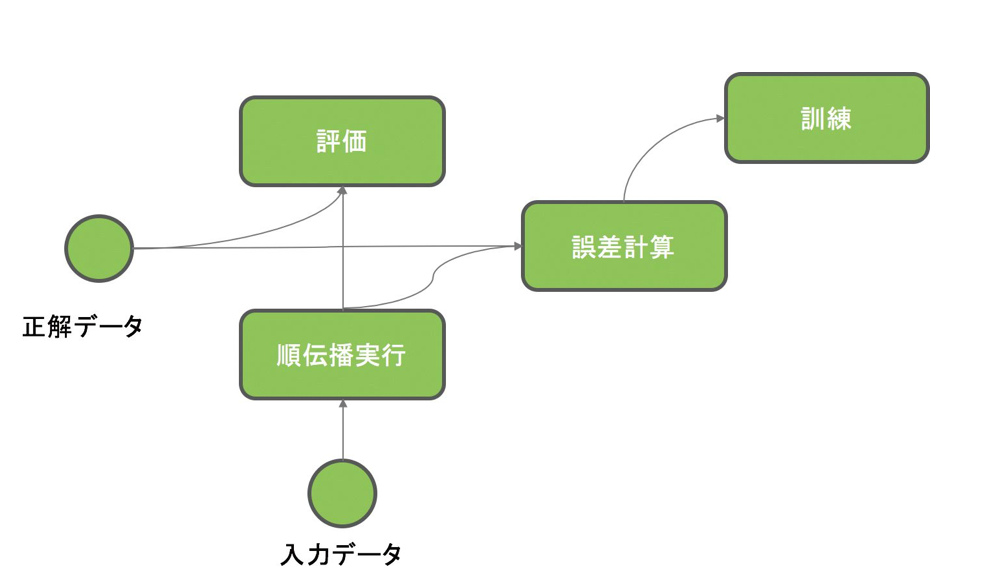

書く内容を箇条書きにして見る。    
- ライブラリインポート    
- データをダウンロード    
- 学習データとテストデータにわける    
- 入力層を定義（入力層の次元に注意）    
- 中間層と最終層を定義    
- 誤差関数を定義    
- 評価関数を定義    
- セッションを書く

In [33]:
#-*- coding:utf-8 -*-
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

#セッション上の計算グラフをクリア
tf.reset_default_graph()
#=====================

#mnistデータを格納したオブジェクトを呼び出す
#0〜255の入力値を255で割って0〜1に正規化してる。平均0標準偏差1になるよう標準化する場合もある。
mnist = input_data.read_data_sets("data/", one_hot=True)

train_images, train_labels = mnist.train.next_batch(50)
#テストデータをロード    
test_images = mnist.test.images    
test_labels = mnist.test.labels  

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


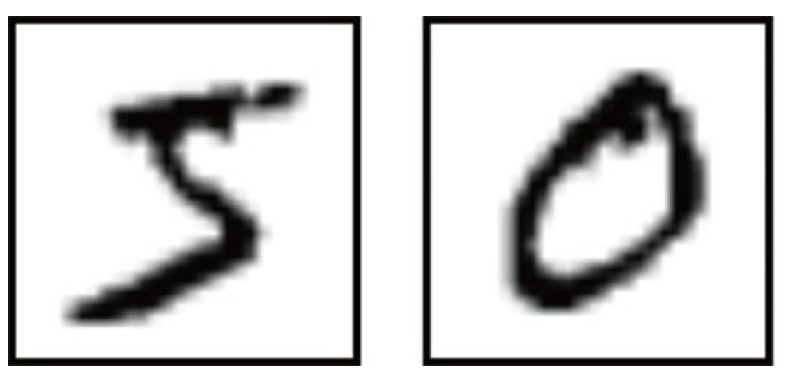

mnistは28 28のグレースケース画像。慣れてくるとデータセットをバイナリデータ（TFではTFRecordという形式が一般的）に変換したほうが効率がいいが、今回はやらない。784の画素値の並びと解釈できる。

入力層は値は後から入れるのでplaceholder。    
画素は正規化されてるのでfloat32。    
[ミニバッチサイズ、1枚画像の画素数]の２階テンソルになるので[None,784]になる。    
テスト時にバッチサイズが合わなくなるので、Noneにしておいたほうが便利。    
正解ラベルは[1,0,0,,,0]のようなワンホットベクトルを並べた行列。

[復習]ニューラルネットの推定：    
xw+b=h  →  func(h)=yを層の数繰り返し    
[最終層]    
分類の場合はsoftmaxとクロスエントロピー    
回帰の場合は恒等関数と２乗誤差    

In [34]:
#入力データを定義
x = tf.placeholder(tf.float32, [None, 784])

中間層のユニット数は64にした。そのために入力層から入ってくる[バッチサイズ、 784]の２階テンソルに線形変換を施して[バッチサイズ、 64]の2階テンソルに変形する。    

重みはtruncated_normalでshapeが784,64で標準偏差0.1で生成。matmulで行列積で調整役のバイアスを足してる。    
重みもバイアスもこの後で確率的勾配法を使って更新される変数でVariableで管理される。

In [35]:
#入力層から中間層
w_1 = tf.Variable(tf.truncated_normal([784, 64], stddev=0.1), name="w1")
b_1 = tf.Variable(tf.zeros([64]), name="b1")
h_1 = tf.nn.relu(tf.matmul(x, w_1) + b_1) #バイアスの足し算時にブロードキャスト機能が働く
#ブロードキャスティング機能とは、shapeが合わないテンソル同士の演算をする時に、階数が多い方のshapeに合わせてうまく演算を行なってくれる仕組み

In [132]:
#中間層から出力層
w_2 = tf.Variable(tf.truncated_normal([64, 10], stddev=0.1), name="w2")
b_2 = tf.Variable(tf.zeros([10]), name="b2")
out = tf.nn.softmax(tf.matmul(h_1, w_2) + b_2) #最後にsoftmax

In [133]:
#誤差関数
y = tf.placeholder(tf.float32, [None, 10])
loss = tf.reduce_mean(tf.square(y - out)) #squareで２乗誤差。reduce_meanで平均。

In [134]:
#訓練
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss) 
#誤差を元に誤差逆伝播法で誤差関数に対する各種パラメータの勾配を計算し、
#確率的勾配降下法(GradientDescentOptimizer)でパラメータを訓練。
#minimizeを使用することで引数で与えられた誤差に対するパラメータの勾配を計算してアップデートしてくれる。
#内部的にはcompute_gradientsとapply_gradientsを呼んでるので分散処理時には単にGradientDescentOptimizerを使ってはいけない。

In [135]:
#評価
#[,,,]の塊の中（1階テンソル）でargmaxで一番大きいものが同じであればOK
#バッチサイズと等しい1階テンソル
correct = tf.equal(tf.argmax(out,1), tf.argmax(y,1)) 
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) #castでfloat32に変換

In [140]:

#変数の初期化
init =tf.global_variables_initializer()

with tf.Session() as sess: 
    sess.run(init)
    step = 0    
    for i in range(1000):
        step = i + 1
        #ミニバッチで50データずつ実行
        train_images, train_labels = mnist.train.next_batch(50)
        sess.run(train_step, feed_dict={x:train_images ,y:train_labels})
        
        #10ステップごとにaccuracyを計算する。下記の実行ではlossの計算グラフは実行されない。
        if step % 10 == 0:
            acc_val = sess.run(accuracy ,feed_dict={x:test_images, y:test_labels})
            print('Step %d: accuracy = %.2f' % (step, acc_val))
#             print(sess.run(correct, feed_dict={x:train_images ,y:train_labels}))

Step 10: accuracy = 0.11
Step 20: accuracy = 0.17
Step 30: accuracy = 0.23
Step 40: accuracy = 0.28
Step 50: accuracy = 0.32
Step 60: accuracy = 0.34
Step 70: accuracy = 0.36
Step 80: accuracy = 0.37
Step 90: accuracy = 0.39
Step 100: accuracy = 0.41
Step 110: accuracy = 0.42
Step 120: accuracy = 0.42
Step 130: accuracy = 0.46
Step 140: accuracy = 0.48
Step 150: accuracy = 0.50
Step 160: accuracy = 0.53
Step 170: accuracy = 0.56
Step 180: accuracy = 0.56
Step 190: accuracy = 0.57
Step 200: accuracy = 0.59
Step 210: accuracy = 0.60
Step 220: accuracy = 0.62
Step 230: accuracy = 0.63
Step 240: accuracy = 0.64
Step 250: accuracy = 0.65
Step 260: accuracy = 0.66
Step 270: accuracy = 0.69
Step 280: accuracy = 0.69
Step 290: accuracy = 0.71
Step 300: accuracy = 0.71
Step 310: accuracy = 0.74
Step 320: accuracy = 0.75
Step 330: accuracy = 0.76
Step 340: accuracy = 0.77
Step 350: accuracy = 0.78
Step 360: accuracy = 0.79
Step 370: accuracy = 0.80
Step 380: accuracy = 0.80
Step 390: accuracy = 

まだ深層学習でもないのに90%に近い精度ですごいですねという終わり。

In [137]:
show_graph(tf.get_default_graph().as_graph_def()) # show graph